In [302]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils.class_weight import compute_class_weight

In [303]:
df_train = pd.read_csv('./data/forest-cover-type/train.csv', index_col=0 )
X_test = pd.read_csv('./data/forest-cover-type/test.csv', index_col=0 )

In [304]:
df_train.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2959.215150,155.551260,14.122850,269.605630,46.821590,2350.361130,212.103800,223.348670,142.585660,1976.436530,...,0.090250,0.079220,0.002800,0.003080,0.000200,0.000570,0.027890,0.024050,0.015440,2.054180
std,280.832825,111.759698,7.507368,212.770595,58.689319,1560.499103,26.841126,19.756411,38.459542,1324.925172,...,0.286541,0.270083,0.052841,0.055412,0.014141,0.023868,0.164658,0.153205,0.123295,1.398794
min,1860.000000,0.000000,0.000000,0.000000,-161.000000,0.000000,0.000000,42.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,59.000000,9.000000,108.000000,7.000000,1103.000000,198.000000,213.000000,119.000000,1020.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1992.000000,218.000000,226.000000,143.000000,1704.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3331.250000,231.000000,237.000000,169.000000,2549.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,62.000000,1383.000000,598.000000,7078.000000,254.000000,254.000000,254.000000,7126.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [305]:
# pas de valeur manquante
df_train[df_train.isnull().any(axis=1)]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type


In [306]:
df_train.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

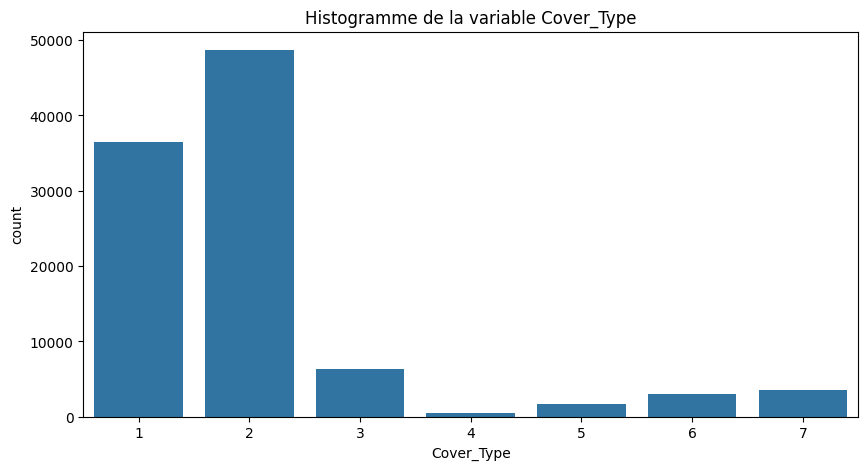

In [307]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Cover_Type', data=df_train)
plt.title(f"Histogramme de la variable Cover_Type")
plt.show()

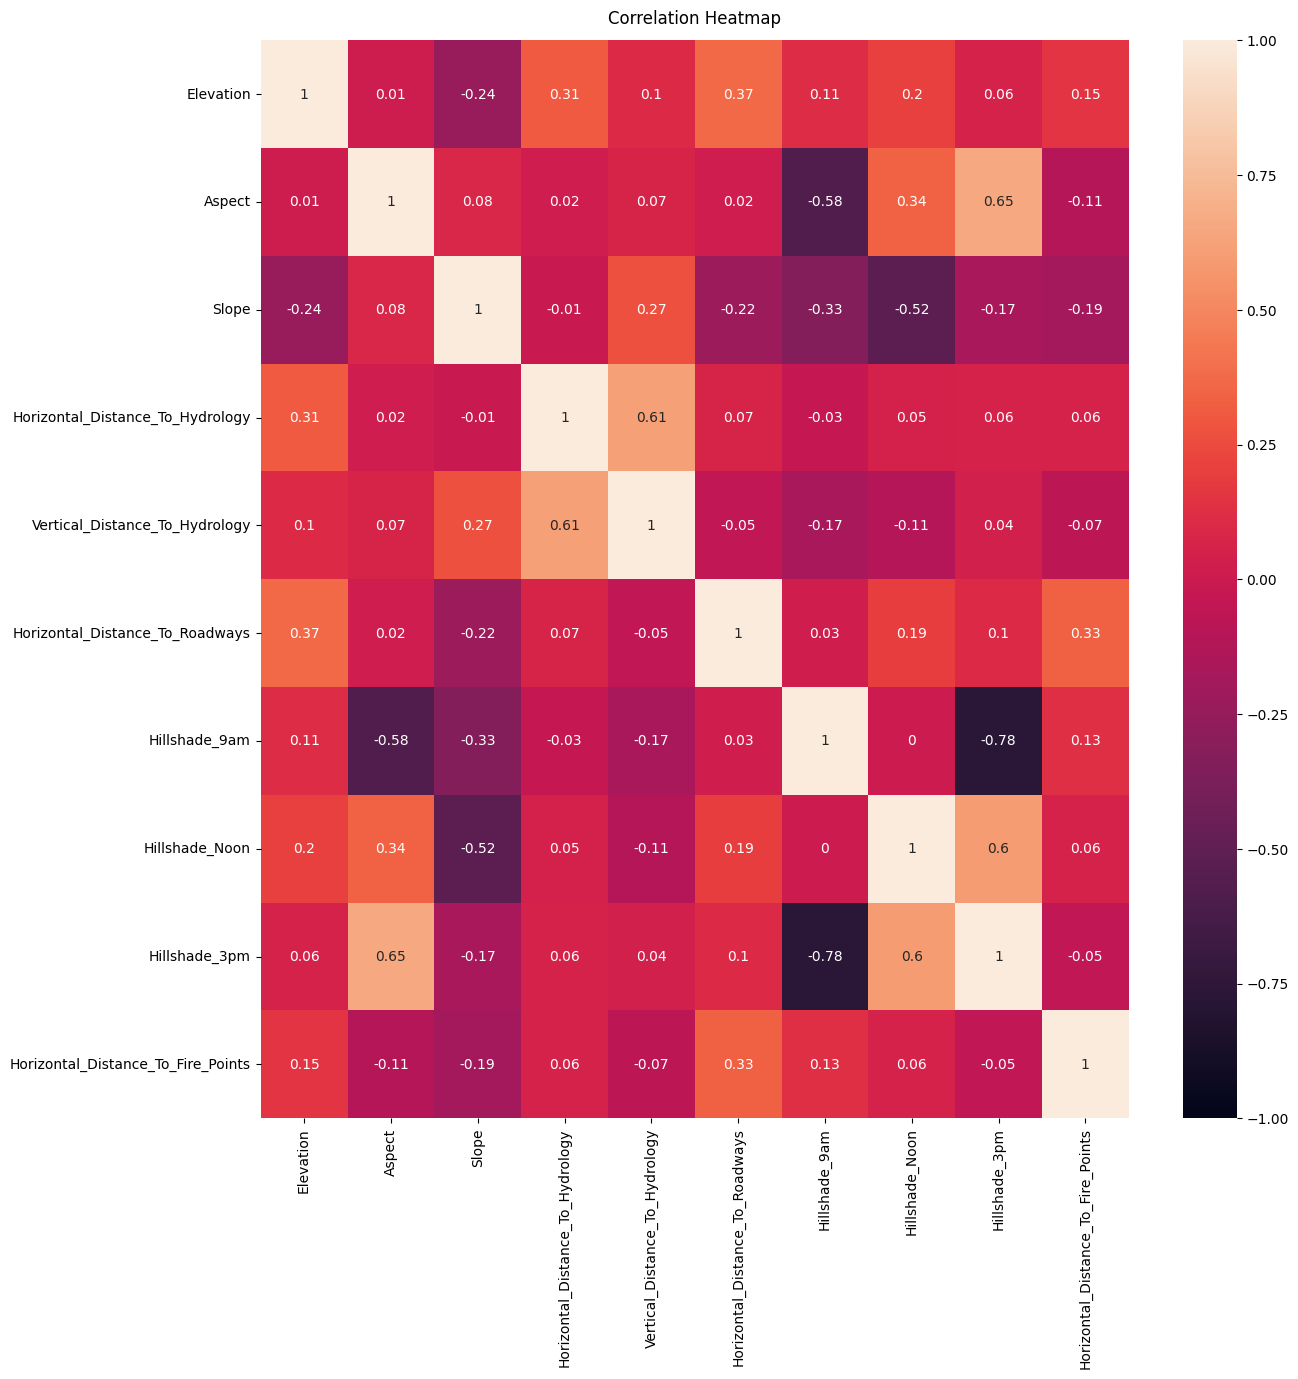

In [308]:
plt.figure(figsize=(14, 14))
df_cor = df_train[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']]
# Calcul de la matrice de corrélation
correlation_matrix = df_cor.corr().round(2)

heatmap = sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

# Répartition des données 

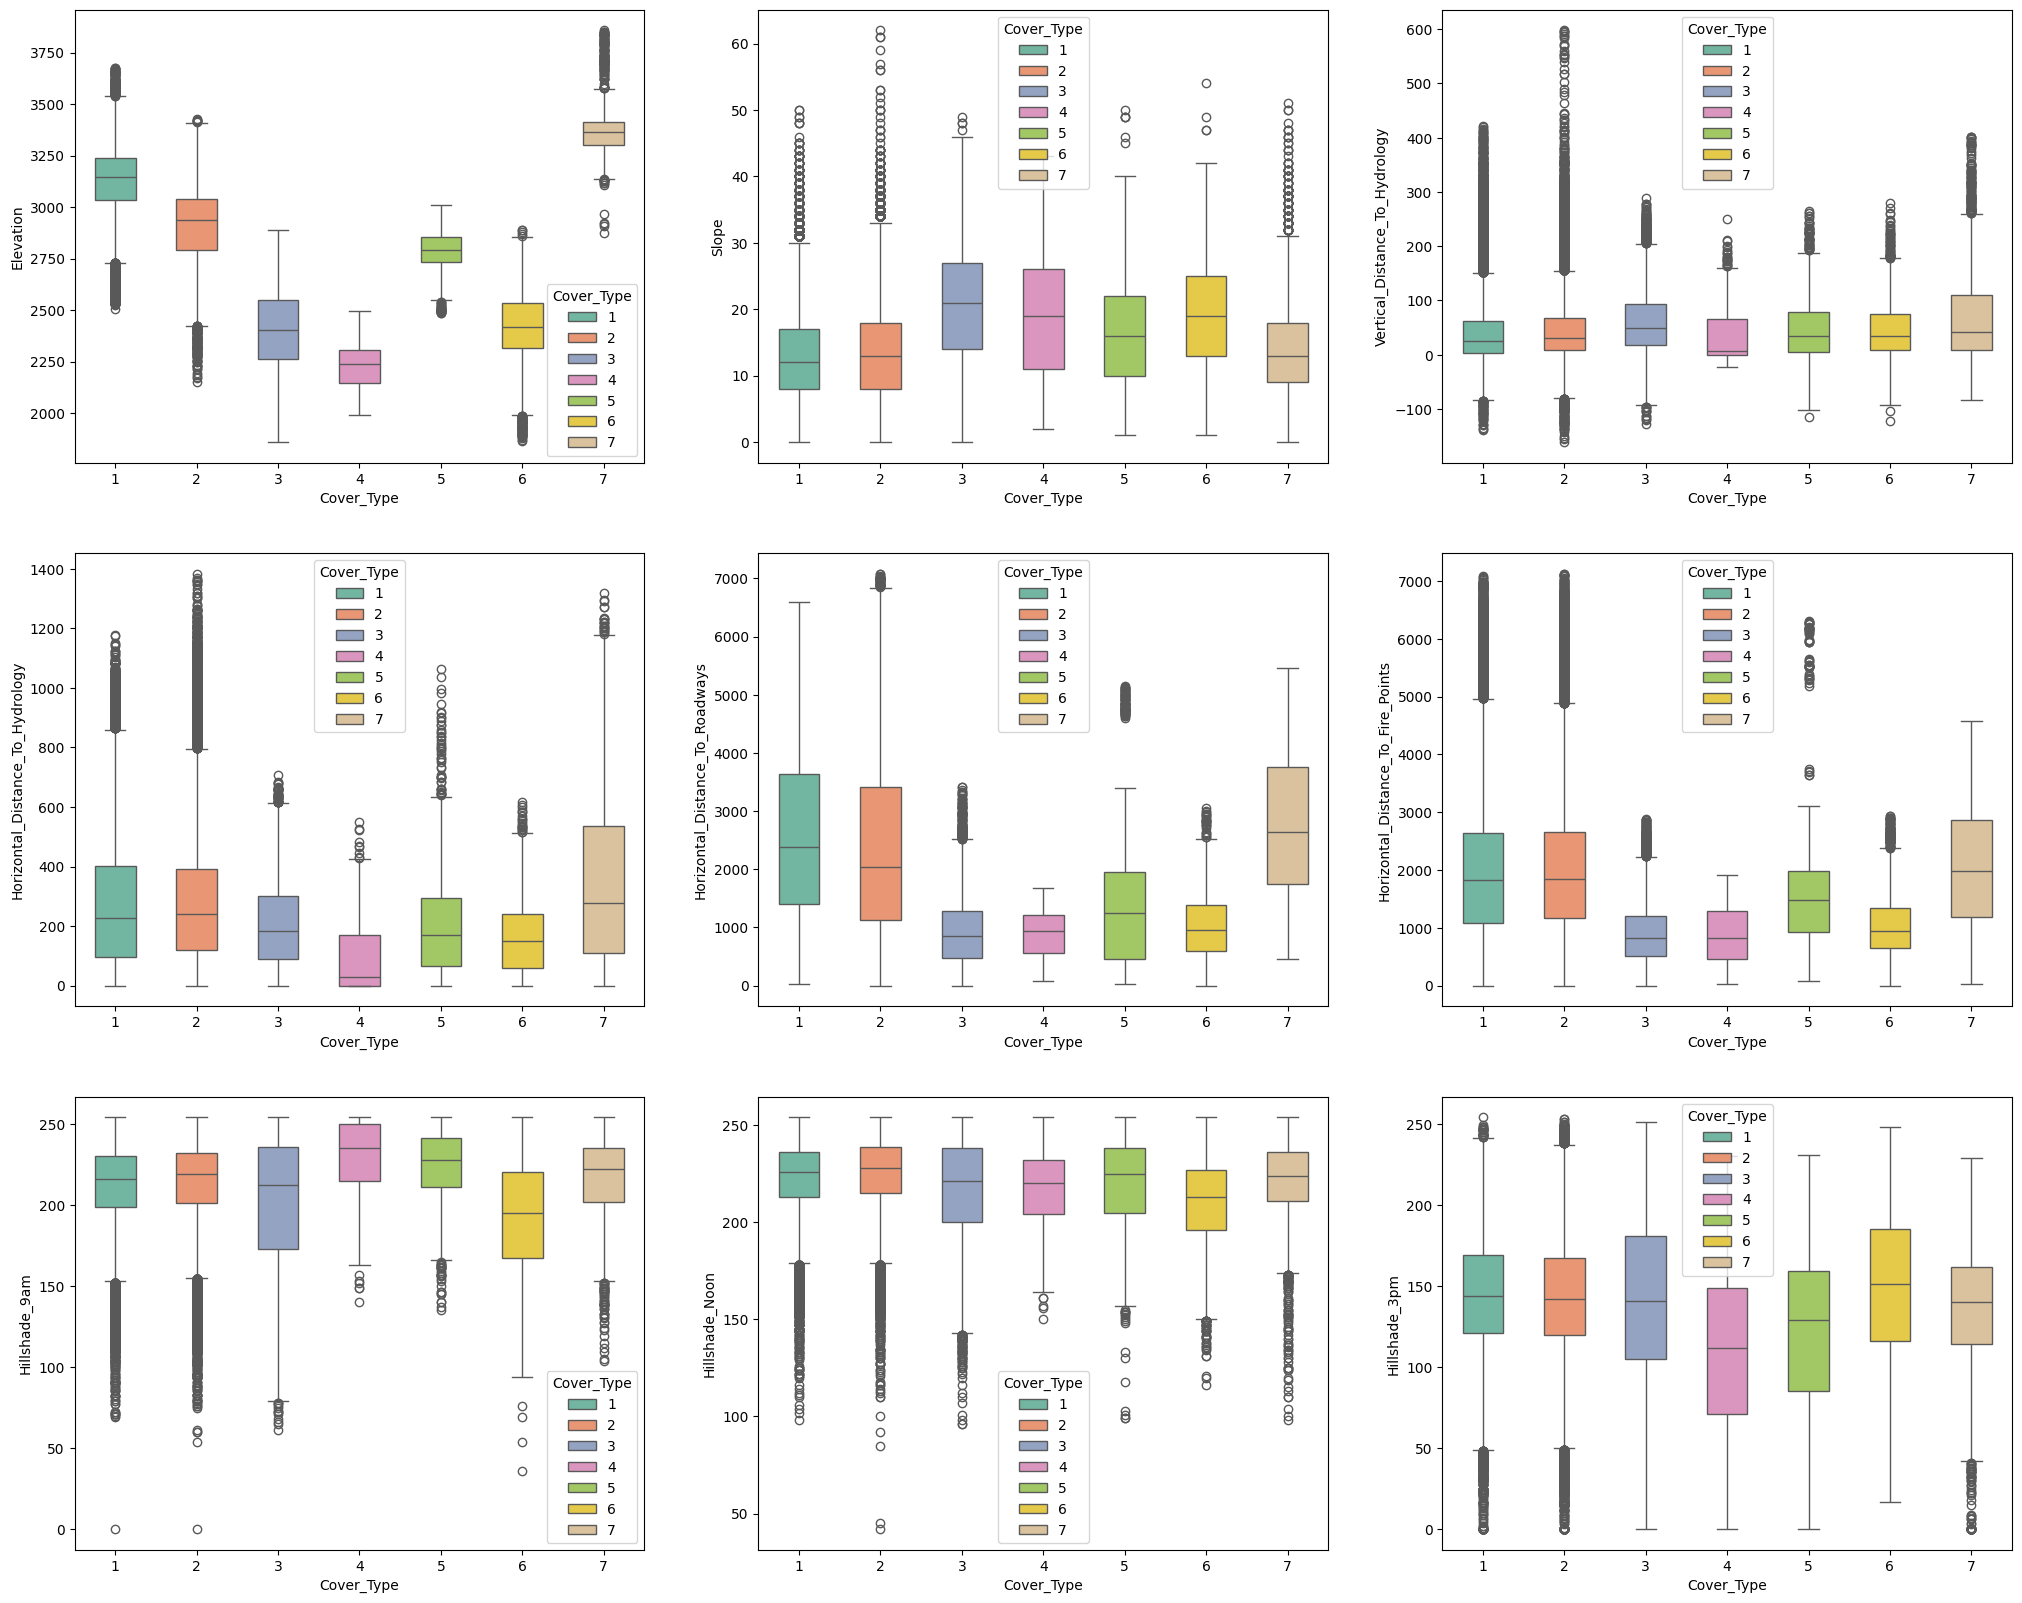

In [309]:
unique_values = df_train['Cover_Type'].nunique()  # Nombre de valeurs uniques de Cover_Type
cmap = sns.color_palette("Set2", unique_values)

def boxPlot(first_feature, sec_feature):
    sns.boxplot(x=first_feature, y=sec_feature, data=df_train, hue=first_feature,palette=cmap, width=0.5)

f = plt.figure(figsize=(25,20))
f.add_subplot(331)
boxPlot('Cover_Type','Elevation')
f.add_subplot(332)
boxPlot('Cover_Type','Slope')
f.add_subplot(333)
boxPlot('Cover_Type','Vertical_Distance_To_Hydrology')
f.add_subplot(334)
boxPlot('Cover_Type','Horizontal_Distance_To_Hydrology')
f.add_subplot(335)
boxPlot('Cover_Type','Horizontal_Distance_To_Roadways')
f.add_subplot(336)
boxPlot('Cover_Type','Horizontal_Distance_To_Fire_Points')
f.add_subplot(337)
boxPlot('Cover_Type','Hillshade_9am')
f.add_subplot(338)
boxPlot('Cover_Type','Hillshade_Noon')
f.add_subplot(339)
boxPlot('Cover_Type','Hillshade_3pm')

Les types 1 et 2 sont globalement très proches

In [310]:
# valeurs égatives pour Vertical_Distance_To_Hydrology 
df_train['Vertical_Distance_To_Hydrology'] = abs(df_train['Vertical_Distance_To_Hydrology'] )

# Regroupement de variables

In [311]:
# créer les nouvelles colonnes pour les zones climatiques et géologiques
for i in range(1, 9):
    df_train[f'Climatic_Zone_{i}'] = df_train[[f'Soil_Type{j}' for j in range(1, 41) if str(j).zfill(2)[0] == str(i)]].sum(axis=1)
    df_train[f'Geologic_Zone_{i}'] = df_train[[f'Soil_Type{j}' for j in range(1, 41) if str(j).zfill(2)[1] == str(i)]].sum(axis=1)
    X_test[f'Climatic_Zone_{i}'] = X_test[[f'Soil_Type{j}' for j in range(1, 41) if str(j).zfill(2)[0] == str(i)]].sum(axis=1)
    X_test[f'Geologic_Zone_{i}'] = X_test[[f'Soil_Type{j}' for j in range(1, 41) if str(j).zfill(2)[1] == str(i)]].sum(axis=1)

# Vérifier les nouvelles colonnes
print(df_train[[f'Climatic_Zone_{i}' for i in range(1, 9)] + [f'Geologic_Zone_{i}' for i in range(1, 9)]])

# Supprimer les colonnes des types de sol après regroupement
df_train.drop(columns=['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
                 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
                 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
                 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
                 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
                 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
                 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
                 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
                 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38',
                 'Soil_Type39', 'Soil_Type40'],
         inplace=True)

X_test.drop(columns=['Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5',
                 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10',
                 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14',
                 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18',
                 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22',
                 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26',
                 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30',
                 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34',
                 'Soil_Type35', 'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 
                 'Soil_Type39', 'Soil_Type40'],
         inplace=True)

       Climatic_Zone_1  Climatic_Zone_2  Climatic_Zone_3  Climatic_Zone_4  \
0                    0                0                1                0   
1                    0                1                0                0   
2                    0                0                1                0   
3                    0                0                1                0   
4                    0                0                1                0   
...                ...              ...              ...              ...   
99995                0                0                0                0   
99996                0                1                0                0   
99997                0                0                0                0   
99998                0                1                0                0   
99999                1                0                0                0   

       Climatic_Zone_5  Climatic_Zone_6  Climatic_Zone_7  Climatic_Zone_8  

# Gestion des Outliers 

In [312]:
df_train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Cover_Type', 'Climatic_Zone_1', 'Geologic_Zone_1', 'Climatic_Zone_2',
       'Geologic_Zone_2', 'Climatic_Zone_3', 'Geologic_Zone_3',
       'Climatic_Zone_4', 'Geologic_Zone_4', 'Climatic_Zone_5',
       'Geologic_Zone_5', 'Climatic_Zone_6', 'Geologic_Zone_6',
       'Climatic_Zone_7', 'Geologic_Zone_7', 'Climatic_Zone_8',
       'Geologic_Zone_8'],
      dtype='object')

In [313]:
columns_to_keep = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points']
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

# Appliquer sur tout le dataset
for column in columns_to_keep:
    df_train = handle_outliers(df_train, column)




# Séparation des données 

In [314]:
# separation des données
X = df_train.drop(columns=['Cover_Type'])
y = df_train['Cover_Type']

In [315]:
# divise les données 
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=42)

In [316]:
X_train.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Climatic_Zone_1', 'Geologic_Zone_1', 'Climatic_Zone_2',
       'Geologic_Zone_2', 'Climatic_Zone_3', 'Geologic_Zone_3',
       'Climatic_Zone_4', 'Geologic_Zone_4', 'Climatic_Zone_5',
       'Geologic_Zone_5', 'Climatic_Zone_6', 'Geologic_Zone_6',
       'Climatic_Zone_7', 'Geologic_Zone_7', 'Climatic_Zone_8',
       'Geologic_Zone_8'],
      dtype='object')

# Scaling

In [317]:

columns_to_keep = ['Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Geologic_Zone_1','Climatic_Zone_1', 'Climatic_Zone_2', 'Geologic_Zone_2',
       'Climatic_Zone_3', 'Geologic_Zone_3', 'Climatic_Zone_4',
       'Geologic_Zone_4', 'Climatic_Zone_5', 'Geologic_Zone_5',
       'Climatic_Zone_6', 'Geologic_Zone_6', 'Climatic_Zone_7',
       'Geologic_Zone_7', 'Climatic_Zone_8', 'Geologic_Zone_8']
columns_to_norm = [col for col in X.columns if col not in columns_to_keep]

X_train_scaled = X_train.copy()
X_val_scaled = X_val.copy()
X_test_scaled = X_test.copy()

scaler = StandardScaler()
# Normalisation sur l'ensemble d'entraînement
X_train_scaled[columns_to_norm] = scaler.fit_transform(X_train[columns_to_norm])

# Appliquer la même transformation sur l'ensemble de validation
X_val_scaled[columns_to_norm] = scaler.transform(X_val[columns_to_norm])


#données test 
X_test_scaled[columns_to_norm] = scaler.transform(X_test[columns_to_norm])

## Random Forest

In [318]:
classes = np.array([1, 2, 3, 4, 5, 6, 7])
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))
# Créez un modèle de forêt aléatoire
rf_model = RandomForestClassifier(class_weight=class_weights_dict)

# Entraînez le modèle sur l'ensemble d'entraînement
rf_model.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_val)

# Calcul de l'exactitude
accuracy = accuracy_score(y_val, y_pred)
print(f"Exactitude du modèle : {accuracy:.2f}")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

f1 = f1_score(y_val, y_pred, average='weighted')  # weighted gère les classes déséquilibrées
print(f"F1-score (pondéré) : {f1:.2f}")

Exactitude du modèle : 0.90
[[ 7998  1001     0     0     6     4    47]
 [  586 11546    41     0    23    36     4]
 [    0    70  1405    12     3    50     0]
 [    0     0    29    62     0     4     0]
 [    3   201     9     0   226     1     0]
 [    0    70   145     6     0   541     0]
 [  103    11     0     0     0     0   757]]
              precision    recall  f1-score   support

           1       0.92      0.88      0.90      9056
           2       0.90      0.94      0.92     12236
           3       0.86      0.91      0.89      1540
           4       0.78      0.65      0.71        95
           5       0.88      0.51      0.65       440
           6       0.85      0.71      0.77       762
           7       0.94      0.87      0.90       871

    accuracy                           0.90     25000
   macro avg       0.87      0.78      0.82     25000
weighted avg       0.90      0.90      0.90     25000

F1-score (pondéré) : 0.90


In [319]:
predictions = rf_model.predict(X_test)

df_pred = pd.DataFrame(predictions, columns=["Cover_Type"]).reset_index().rename(columns={"index": "row_ID"})
display(df_pred.head(15))

df_pred.to_parquet("submission/forest-cover-type/RF_1_sub_1.parquet", index=False)

,row_ID,Cover_Type
0,0,2
1,1,2
2,2,3
3,3,2
4,4,3
5,5,2
6,6,1
7,7,1
8,8,2
9,9,1


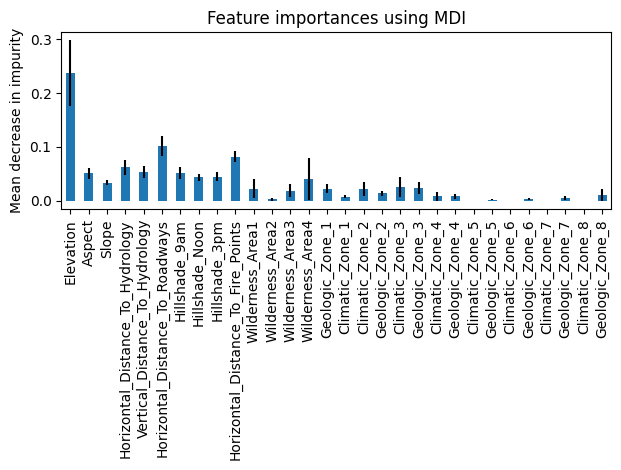

In [285]:
feature_names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1',
       'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4',
       'Geologic_Zone_1','Climatic_Zone_1', 'Climatic_Zone_2', 'Geologic_Zone_2',
       'Climatic_Zone_3', 'Geologic_Zone_3', 'Climatic_Zone_4',
       'Geologic_Zone_4', 'Climatic_Zone_5', 'Geologic_Zone_5',
       'Climatic_Zone_6', 'Geologic_Zone_6', 'Climatic_Zone_7',
       'Geologic_Zone_7', 'Climatic_Zone_8', 'Geologic_Zone_8']
importances = rf_model.feature_importances_
forest_importances = pd.Series(importances, index=feature_names)

std = np.std([tree.feature_importances_ for tree in rf_model.estimators_], axis=0)
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

# SVM

In [300]:
from sklearn.svm import SVC

# Initialiser le modèle SVM
svm_model = SVC()

# Entraîner le modèle SVM sur les données 
svm_model.fit(X_train, y_train)

# Prédictions sur les données de validation
y_pred = svm_model.predict(X_val)

# Calcul de l'exactitude
accuracy = accuracy_score(y_val, y_pred)
print(f"Exactitude du modèle : {accuracy:.2f}")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

f1 = f1_score(y_val, y_pred, average='weighted')  # weighted gère les classes déséquilibrées
print(f"F1-score (pondéré) : {f1:.2f}")

Exactitude du modèle : 0.70
[[6492 2562    0    0    0    0    2]
 [2227 9884  125    0    0    0    0]
 [   0  412 1128    0    0    0    0]
 [   0    1   94    0    0    0    0]
 [   0  440    0    0    0    0    0]
 [   0  232  530    0    0    0    0]
 [ 748    3    0    0    0    0  120]]
              precision    recall  f1-score   support

           1       0.69      0.72      0.70      9056
           2       0.73      0.81      0.77     12236
           3       0.60      0.73      0.66      1540
           4       0.00      0.00      0.00        95
           5       0.00      0.00      0.00       440
           6       0.00      0.00      0.00       762
           7       0.98      0.14      0.24       871

    accuracy                           0.70     25000
   macro avg       0.43      0.34      0.34     25000
weighted avg       0.68      0.70      0.68     25000

F1-score (pondéré) : 0.68


/Users/elonalahmi/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elonalahmi/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/elonalahmi/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

## KNN

In [321]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5, weights="distance")

# Entraînez le modèle sur l'ensemble d'entraînement
knn_model.fit(X_train, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = knn_model.predict(X_val)

# Calcul de l'exactitude
accuracy = accuracy_score(y_val, y_pred)
print(f"Exactitude du modèle : {accuracy:.2f}")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

f1 = f1_score(y_val, y_pred, average='weighted')  # weighted gère les classes déséquilibrées
print(f"F1-score (pondéré) : {f1:.2f}")

Exactitude du modèle : 0.90
[[ 8133   844     0     0    15     2    62]
 [  718 11351    65     0    56    38     8]
 [    0    62  1368    22     4    84     0]
 [    0     0    23    58     0    14     0]
 [   11   107     6     0   315     1     0]
 [    1    44   120    10     3   584     0]
 [   69    11     0     0     0     0   791]]
              precision    recall  f1-score   support

           1       0.91      0.90      0.90      9056
           2       0.91      0.93      0.92     12236
           3       0.86      0.89      0.88      1540
           4       0.64      0.61      0.63        95
           5       0.80      0.72      0.76       440
           6       0.81      0.77      0.79       762
           7       0.92      0.91      0.91       871

    accuracy                           0.90     25000
   macro avg       0.84      0.82      0.83     25000
weighted avg       0.90      0.90      0.90     25000

F1-score (pondéré) : 0.90


## courbe ROC OvR

[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 1 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


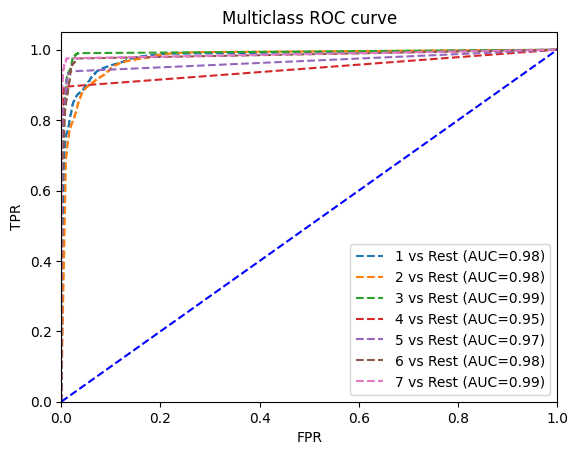

In [329]:
from sklearn.preprocessing import label_binarize

# probabilités de prédiction pour chaque classe
pred_prob = knn_model.predict_proba(X_val)
y_test_binarized = label_binarize(y_val,classes=np.unique(y_val))
print(y_test_binarized)
Classes = ['1','2', '3', '4', '5', '6', '7']

from sklearn.metrics import roc_curve,auc

fpr = {}
tpr = {}
thresh ={}
roc_auc = dict()
n_class = 7

for i in range(n_class):    
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test_binarized[:,i], pred_prob[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    # plotting    
    plt.plot(fpr[i], tpr[i], linestyle='--',label='%s vs Rest (AUC=%0.2f)'%(Classes[i],roc_auc[i]))
    
plt.plot([0,1],[0,1],'b--')
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.title('Multiclass ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='lower right')
plt.show()

In [330]:
from sklearn.metrics import roc_auc_score
y_scores = knn_model.predict_proba(X_val)
roc_auc_score(y_val, y_scores,multi_class = "ovr")

np.float64(0.9758742346907632)

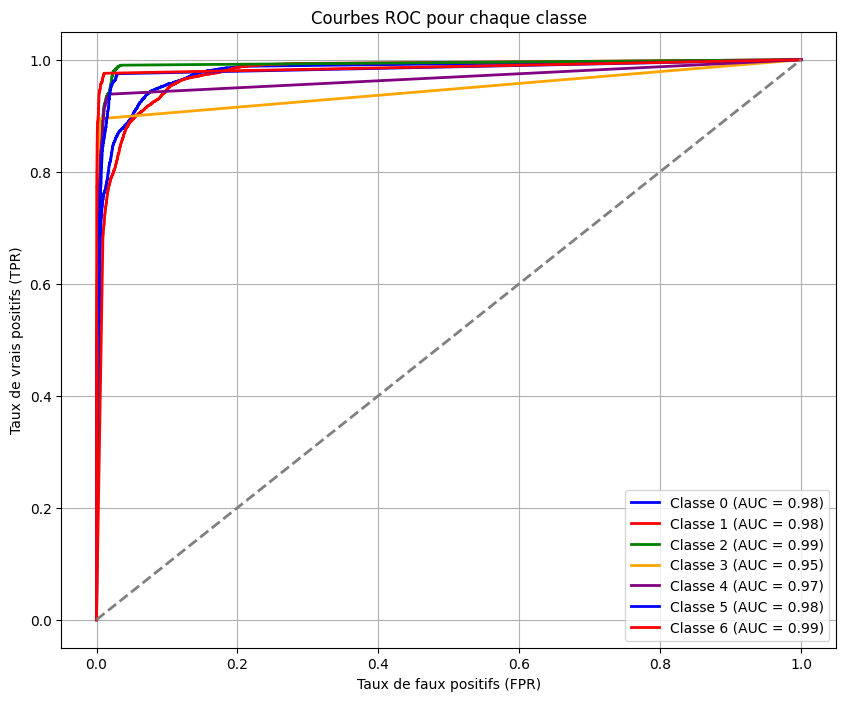

AUC (macro-moyenné) : 0.98
AUC (micro-moyenné) : 0.99


In [334]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

# Binariser les labels pour un problème multiclasse
n_classes = 7  # Obtenir le nombre de classes
y_val_binarized = label_binarize(y_val, classes=np.unique(y_val))
y_pred_prob = knn_model.predict_proba(X_val)  # Obtenir les probabilités de prédiction pour chaque classe

# Tracé des courbes ROC pour chaque classe
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_binarized[:, i], y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Tracé de toutes les courbes ROC
plt.figure(figsize=(10, 8))
colors = ['blue', 'red', 'green', 'orange', 'purple']  # Ajouter plus de couleurs si nécessaire

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i % len(colors)],
             lw=2, label=f'Classe {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Ligne de référence (prédiction aléatoire)
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbes ROC pour chaque classe')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# Calcul de l'AUC moyenne (macro et micro)
roc_auc_macro = roc_auc_score(y_val_binarized, y_pred_prob, average='macro')
roc_auc_micro = roc_auc_score(y_val_binarized, y_pred_prob, average='micro')

print(f"AUC (macro-moyenné) : {roc_auc_macro:.2f}")
print(f"AUC (micro-moyenné) : {roc_auc_micro:.2f}")


In [322]:
predictions = knn_model.predict(X_test)

df_pred = pd.DataFrame(predictions, columns=["Cover_Type"]).reset_index().rename(columns={"index": "row_ID"})
display(df_pred.head(15))

df_pred.to_parquet("submission/forest-cover-type/KNN_1_sub_1.parquet", index=False)

,row_ID,Cover_Type
0,0,2
1,1,2
2,2,3
3,3,2
4,4,3
5,5,2
6,6,1
7,7,1
8,8,2
9,9,1


# LDA

Variance expliquée par chaque composante de la LDA: [0.77940549 0.14875637 0.04015565 0.01471387 0.01161393 0.00535469]


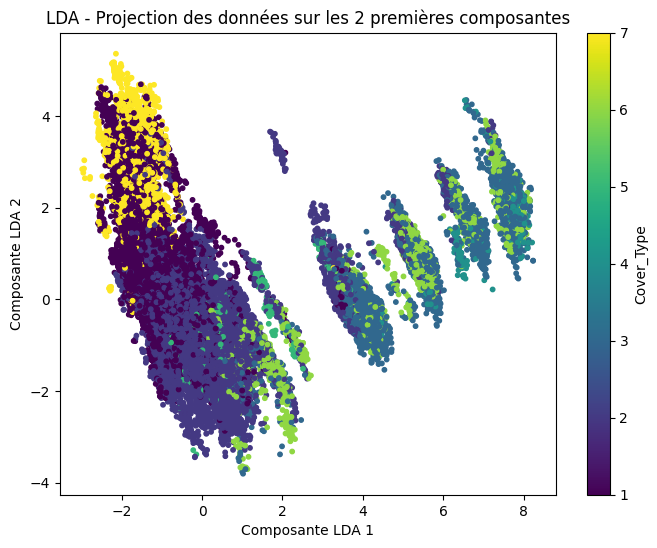

In [287]:
# appliquer lda
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
# initialize the LDA
lda = LDA()
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_val_lda = lda.transform(X_val_scaled)

# données test
X_test_lda = lda.transform(X_test_scaled)

# Afficher la variance expliquée par chaque composante de la LDA
print(f"Variance expliquée par chaque composante de la LDA: {lda.explained_variance_ratio_}")

# Visualiser les résultats de la LDA
plt.figure(figsize=(8, 6))
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train, cmap='viridis', s=10)
plt.title('LDA - Projection des données sur les 2 premières composantes')
plt.xlabel('Composante LDA 1')
plt.ylabel('Composante LDA 2')
plt.colorbar(label='Cover_Type')
plt.show()

## Random Forest

In [288]:
from sklearn.model_selection import GridSearchCV
classes = np.array([1, 2, 3, 4, 5, 6, 7])
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))
# Créez un modèle de forêt aléatoire
rf_model = RandomForestClassifier(class_weight=class_weights_dict)

# Entraînez le modèle sur l'ensemble d'entraînement
rf_model.fit(X_train_lda, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_val_lda)

# Calcul de l'exactitude
accuracy = accuracy_score(y_val, y_pred)
print(f"Exactitude du modèle : {accuracy:.2f}")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

f1 = f1_score(y_val, y_pred, average='weighted')  # weighted gère les classes déséquilibrées
print(f"F1-score (pondéré) : {f1:.2f}")

Exactitude du modèle : 0.83
[[ 7374  1593     3     0     8     5    73]
 [ 1262 10813    62     0    32    58     9]
 [    0    99  1301    18     8   114     0]
 [    0     0    47    40     0     8     0]
 [    9   241     7     0   182     1     0]
 [    1    97   257    10     2   395     0]
 [  160    11     0     0     0     0   700]]
              precision    recall  f1-score   support

           1       0.84      0.81      0.83      9056
           2       0.84      0.88      0.86     12236
           3       0.78      0.84      0.81      1540
           4       0.59      0.42      0.49        95
           5       0.78      0.41      0.54       440
           6       0.68      0.52      0.59       762
           7       0.90      0.80      0.85       871

    accuracy                           0.83     25000
   macro avg       0.77      0.67      0.71     25000
weighted avg       0.83      0.83      0.83     25000

F1-score (pondéré) : 0.83


## Gradient Boosting

In [289]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialisation et entraînement du modèle Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_lda, y_train)

# Prédiction sur l'ensemble de test
y_pred = gb_model.predict(X_val_lda)

# Calcul de l'exactitude
accuracy = accuracy_score(y_val, y_pred)
print(f"Exactitude du modèle : {accuracy:.2f}")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

f1 = f1_score(y_val, y_pred, average='weighted')  # weighted gère les classes déséquilibrées
print(f"F1-score (pondéré) : {f1:.2f}")

Exactitude du modèle : 0.74
[[6550 2358    3    0    5    8  132]
 [2336 9657  119    1   27   82   14]
 [   0  158 1255   19    1  107    0]
 [   0    0   53   33    0    9    0]
 [   5  328   16    0   88    3    0]
 [   0  158  348    6    0  250    0]
 [ 282    3    0    0    0    0  586]]
              precision    recall  f1-score   support

           1       0.71      0.72      0.72      9056
           2       0.76      0.79      0.78     12236
           3       0.70      0.81      0.75      1540
           4       0.56      0.35      0.43        95
           5       0.73      0.20      0.31       440
           6       0.54      0.33      0.41       762
           7       0.80      0.67      0.73       871

    accuracy                           0.74     25000
   macro avg       0.69      0.55      0.59     25000
weighted avg       0.73      0.74      0.73     25000

F1-score (pondéré) : 0.73


## Regression Logistique Multivarée

In [290]:
from sklearn.linear_model import LogisticRegression
model_reglog = LogisticRegression(class_weight=class_weights_dict, max_iter=300)
model_reglog.fit(X_train_lda, y_train)
# Prédiction sur l'ensemble de test

y_pred = model_reglog.predict(X_val_lda)

# Calcul de l'exactitude
accuracy = accuracy_score(y_val, y_pred)
print(f"Exactitude du modèle : {accuracy:.2f}")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

f1 = f1_score(y_val, y_pred, average='weighted')  # weighted gère les classes déséquilibrées
print(f"F1-score (pondéré) : {f1:.2f}")

Exactitude du modèle : 0.57
[[5994 1544   11    0  346   35 1126]
 [2900 5886  194    3 2637  501  115]
 [   0   10  685  270   84  491    0]
 [   0    0   11   72    0   12    0]
 [   1   93   14    0  326    6    0]
 [   0   22  161   78   40  461    0]
 [ 102    0    0    0    2    0  767]]
              precision    recall  f1-score   support

           1       0.67      0.66      0.66      9056
           2       0.78      0.48      0.59     12236
           3       0.64      0.44      0.52      1540
           4       0.17      0.76      0.28        95
           5       0.09      0.74      0.17       440
           6       0.31      0.60      0.41       762
           7       0.38      0.88      0.53       871

    accuracy                           0.57     25000
   macro avg       0.43      0.65      0.45     25000
weighted avg       0.69      0.57      0.60     25000

F1-score (pondéré) : 0.60


## KNN

In [291]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, weights="distance")

# Entraîner le modèle SVM sur les données LDA réduites
knn.fit(X_train_lda, y_train)

# Prédictions sur les données de validation
y_pred = knn.predict(X_val_lda)

# Calcul de l'exactitude
accuracy = accuracy_score(y_val, y_pred)
print(f"Exactitude du modèle : {accuracy:.2f}")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

f1 = f1_score(y_val, y_pred, average='weighted')  # weighted gère les classes déséquilibrées
print(f"F1-score (pondéré) : {f1:.2f}")

Exactitude du modèle : 0.83
[[ 7418  1521     0     0    14     6    97]
 [ 1265 10720    71     0    87    84     9]
 [    1    88  1243    38     6   164     0]
 [    0     0    45    41     0     9     0]
 [   14   171    11     0   241     3     0]
 [    1    68   218    15     3   457     0]
 [  107    17     0     0     0     0   747]]
              precision    recall  f1-score   support

           1       0.84      0.82      0.83      9056
           2       0.85      0.88      0.86     12236
           3       0.78      0.81      0.79      1540
           4       0.44      0.43      0.43        95
           5       0.69      0.55      0.61       440
           6       0.63      0.60      0.62       762
           7       0.88      0.86      0.87       871

    accuracy                           0.83     25000
   macro avg       0.73      0.71      0.72     25000
weighted avg       0.83      0.83      0.83     25000

F1-score (pondéré) : 0.83


### Recher hyperparamètres optimaux KNN

In [43]:
# Initialiser le modèle k-NN
knn = KNeighborsClassifier()

# Définir les hyperparamètres à tester
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Effectuer la Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)
grid_search.fit(X_train_lda, y_train)

# Afficher les meilleurs paramètres trouvés
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Utiliser le meilleur modèle pour faire des prédictions sur les données de validation
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_val_lda)

# Calcul de l'exactitude
accuracy = accuracy_score(y_val, y_pred)
print(f"Exactitude du modèle : {accuracy:.2f}")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

f1 = f1_score(y_val, y_pred, average='weighted')  # weighted gère les classes déséquilibrées
print(f"F1-score (pondéré) : {f1:.2f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best cross-validation accuracy: 0.8245523597926205
Exactitude du modèle : 0.83
[[ 7368  1552     1     0    14     7   114]
 [ 1282 10704    67     0    85    84    14]
 [    0    71  1292    15    12   150     0]
 [    0     0    35    50     0    10     0]
 [   20   172     9     0   236     3     0]
 [    3    75   188    10     3   483     0]
 [  117    14     0     0     0     0   740]]
              precision    recall  f1-score   support

           1       0.84      0.81      0.83      9056
           2       0.85      0.87      0.86     12236
           3       0.81      0.84      0.83      1540
           4       0.67      0.53      0.59        95
           5       0.67      0.54      0.60       440
           6       0.66      0.63      0.64       762
           7       0.85      0.85      0.85       871

    accuracy         

## SVM

In [292]:
from sklearn.svm import SVC

# Initialiser le modèle SVM avec un noyau RBF (ou un autre noyau si nécessaire)
svm_model = SVC( kernel='rbf', C=1, gamma='auto')

# Entraîner le modèle SVM sur les données LDA réduites
svm_model.fit(X_train_lda, y_train)

# Prédictions sur les données de validation
y_pred = svm_model.predict(X_val_lda)

# Calcul de l'exactitude
accuracy = accuracy_score(y_val, y_pred)
print(f"Exactitude du modèle : {accuracy:.2f}")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

f1 = f1_score(y_val, y_pred, average='weighted')  # weighted gère les classes déséquilibrées
print(f"F1-score (pondéré) : {f1:.2f}")


Exactitude du modèle : 0.74
[[6558 2357    4    0    0    6  131]
 [2190 9847  128    0    4   54   13]
 [   0  150 1297   20    1   72    0]
 [   0    0   69   16    0   10    0]
 [   7  362   15    0   53    3    0]
 [   0  175  398    2    0  187    0]
 [ 284    8    0    0    0    0  579]]
              precision    recall  f1-score   support

           1       0.73      0.72      0.72      9056
           2       0.76      0.80      0.78     12236
           3       0.68      0.84      0.75      1540
           4       0.42      0.17      0.24        95
           5       0.91      0.12      0.21       440
           6       0.56      0.25      0.34       762
           7       0.80      0.66      0.73       871

    accuracy                           0.74     25000
   macro avg       0.70      0.51      0.54     25000
weighted avg       0.74      0.74      0.73     25000

F1-score (pondéré) : 0.73


### Recherche hyperparamètres optimaux SVM

In [17]:
### très très long
# Définir les paramètres à tester
param_grid = {
    'C': [10,30, 100],
    'gamma': [1, 10 ],
    'kernel': ['rbf', 'poly']
}

#Best parameters found: {'C': 100, 'gamma': 1, 'kernel': 'rbf'}
#Best cross-validation accuracy: 0.7585472444702385

# Initialiser le modèle SVM
svm = SVC(class_weight=class_weights_dict)

# Utiliser GridSearchCV pour trouver les meilleurs paramètres
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='f1_weighted', verbose=2, n_jobs=-1)

# Entraîner GridSearchCV sur les données LDA réduites
#grid_search.fit(X_train_lda, y_train)

# Afficher les meilleurs paramètres trouvés
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Utiliser le meilleur modèle pour faire des prédictions sur les données de validation
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_val_lda)

# Calcul de l'exactitude
accuracy = accuracy_score(y_val, y_pred)
print(f"Exactitude du modèle : {accuracy:.2f}")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

f1 = f1_score(y_val, y_pred, average='weighted')  # weighted gère les classes déséquilibrées
print(f"F1-score (pondéré) : {f1:.2f}")

Fitting 5 folds for each of 80 candidates, totalling 400 fits


[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.3min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.4min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.5min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.5min
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time= 1.5min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time= 1.5min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time= 1.6min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time= 1.6min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time= 1.6min
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time= 1.7min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 2.2min
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time= 2.2min
[CV] END ...................

/Users/elonalahmi/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time= 1.7min
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time= 1.8min
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time= 2.1min
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time= 1.9min
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time= 1.8min
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time= 2.0min
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time= 1.8min
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time= 1.3min
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time= 1.9min
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time= 1.3min
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time= 1.3min
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time= 1.3min
[CV] END ...................

# ACP

Variance expliquée par chaque composante principale: [0.22447535 0.19082964 0.15567712 0.09707721 0.06936901 0.05070261
 0.04142847 0.03607574 0.02977782 0.02144849 0.02024034 0.01469307]


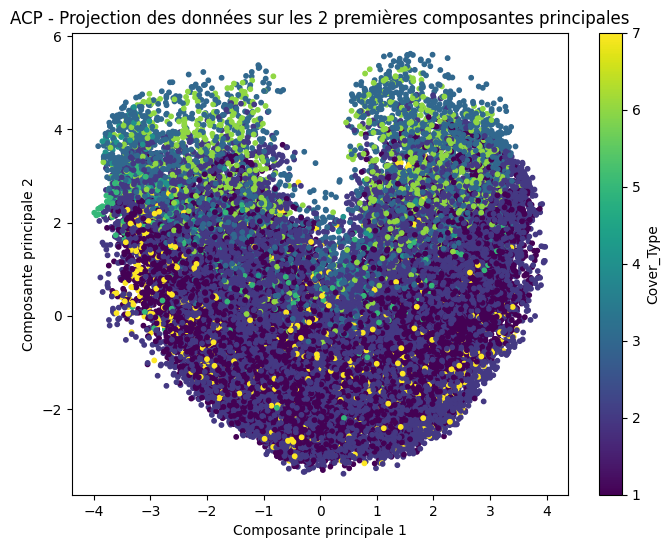

In [293]:
# Appliquer l'ACP
pca = PCA(n_components=0.95)  ## conserve 14 composantes : explique 95% de la variance 
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)

# données test
X_test_pca = pca.transform(X_test_scaled)

# Afficher la variance expliquée par chaque composante principale
print(f"Variance expliquée par chaque composante principale: {pca.explained_variance_ratio_}")

# Visualiser les résultats de l'ACP
plt.figure(figsize=(8, 6))
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', s=10)
plt.title('ACP - Projection des données sur les 2 premières composantes principales')
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.colorbar(label='Cover_Type')
plt.show()

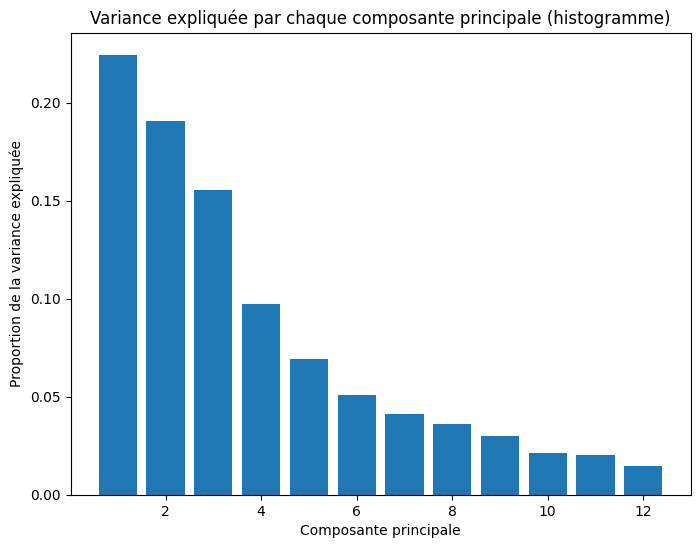

In [294]:
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance) + 1), explained_variance)
plt.title('Variance expliquée par chaque composante principale (histogramme)')
plt.xlabel('Composante principale')
plt.ylabel('Proportion de la variance expliquée')
plt.show()


## Regression Logistique Multivariée

In [295]:
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression


classes = np.array([1, 2, 3, 4, 5, 6, 7])
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights_dict = dict(zip(classes, class_weights))

model_reglog = LogisticRegression(class_weight=class_weights_dict, max_iter=300)
model_reglog.fit(X_train_pca, y_train)
# Prédiction sur l'ensemble de test

y_pred = model_reglog.predict(X_val_pca)

# Calcul de l'exactitude
accuracy = accuracy_score(y_val, y_pred)
print(f"Exactitude du modèle : {accuracy:.2f}")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

f1 = f1_score(y_val, y_pred, average='weighted')  # weighted gère les classes déséquilibrées
print(f"F1-score (pondéré) : {f1:.2f}")

Exactitude du modèle : 0.55
[[5649 1342    4    0  435   43 1583]
 [2938 5641  312   11 2543  490  301]
 [   0    7  747  230  102  454    0]
 [   0    0    6   75    0   14    0]
 [   4   71    7    5  336   17    0]
 [   0   18  187   68   39  450    0]
 [ 102    0    0    0    2    0  767]]
              precision    recall  f1-score   support

           1       0.65      0.62      0.64      9056
           2       0.80      0.46      0.58     12236
           3       0.59      0.49      0.53      1540
           4       0.19      0.79      0.31        95
           5       0.10      0.76      0.17       440
           6       0.31      0.59      0.40       762
           7       0.29      0.88      0.44       871

    accuracy                           0.55     25000
   macro avg       0.42      0.66      0.44     25000
weighted avg       0.68      0.55      0.58     25000

F1-score (pondéré) : 0.58


## Random Forest

In [296]:
from sklearn.model_selection import GridSearchCV
# Créez un modèle de forêt aléatoire
rf_model = RandomForestClassifier(class_weight=class_weights_dict)

# Entraînez le modèle sur l'ensemble d'entraînement
rf_model.fit(X_train_pca, y_train)

# Faites des prédictions sur l'ensemble de test
y_pred = rf_model.predict(X_val_pca)

# Calcul de l'exactitude
accuracy = accuracy_score(y_val, y_pred)
print(f"Exactitude du modèle : {accuracy:.2f}")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

f1 = f1_score(y_val, y_pred, average='weighted')  # weighted gère les classes déséquilibrées
print(f"F1-score (pondéré) : {f1:.2f}")

Exactitude du modèle : 0.86
[[ 7716  1291     0     0     3     0    46]
 [  861 11243    65     1    21    40     5]
 [    0   140  1295    23     3    79     0]
 [    0     1    35    51     0     8     0]
 [    9   268     9     0   154     0     0]
 [    0   136   241     5     1   379     0]
 [  185    13     0     0     0     0   673]]
              precision    recall  f1-score   support

           1       0.88      0.85      0.87      9056
           2       0.86      0.92      0.89     12236
           3       0.79      0.84      0.81      1540
           4       0.64      0.54      0.58        95
           5       0.85      0.35      0.50       440
           6       0.75      0.50      0.60       762
           7       0.93      0.77      0.84       871

    accuracy                           0.86     25000
   macro avg       0.81      0.68      0.73     25000
weighted avg       0.86      0.86      0.86     25000

F1-score (pondéré) : 0.86


In [57]:
predictions = rf_model.predict(X_test_pca)

df_pred = pd.DataFrame(predictions, columns=["Cover_Type"]).reset_index().rename(columns={"index": "row_ID"})
display(df_pred.head(15))

df_pred.to_parquet("submission/forest-cover-type/RF_sub_1.parquet", index=False)

,row_ID,Cover_Type
0,0,2
1,1,2
2,2,3
3,3,2
4,4,3
5,5,2
6,6,2
7,7,1
8,8,2
9,9,1


### Recherche hypermaramètres optimaux Random Forest

In [ ]:
## 22 minutes 
param_grid = {
    'criterion':['gini','entropy'],
    'n_estimators': [100, 200, 300],           # Nombre d'arbres dans la forêt
    'max_depth': [20, 30, 40],                 # Profondeur maximale des arbres
    'min_samples_split': [2, 5, 10],           # Nombre minimum d'échantillons pour diviser un noeud
    'min_samples_leaf': [1, 2, 4]              # Nombre minimum d'échantillons dans chaque feuille
}


# Créer le modèle de forêt aléatoire
rf_model = RandomForestClassifier(random_state=42, class_weight=class_weights_dict)

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres avec validation croisée
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1_weighted', verbose=2, n_jobs=-1)

# Entraîner la recherche sur les données d'entraînement
#grid_search.fit(X_train_pca, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs hyperparamètres trouvés : ", grid_search.best_params_)

# Utiliser les meilleurs hyperparamètres pour refaire des prédictions sur l'ensemble de test
best_rf_model = grid_search.best_estimator_

# Prédire sur l'ensemble de test
y_pred = best_rf_model.predict(X_val_pca)

# Calcul de l'exactitude
accuracy = accuracy_score(y_val, y_pred)
print(f"Exactitude du modèle : {accuracy:.2f}")

# Afficher la matrice de confusion, le rapport de classification, et le F1-score
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

# Calculer le F1-score pondéré
f1 = f1_score(y_val, y_pred, average='weighted')
print(f"F1-score (pondéré) : {f1:.2f}")

## KNN

In [297]:
knn = KNeighborsClassifier(n_neighbors=5, weights="distance")

# Entraîner le modèle SVM sur les données LDA réduites
knn.fit(X_train_pca, y_train)

# Prédictions sur les données de validation
y_pred = knn.predict(X_val_pca)

# Calcul de l'exactitude
accuracy = accuracy_score(y_val, y_pred)
print(f"Exactitude du modèle : {accuracy:.2f}")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

f1 = f1_score(y_val, y_pred, average='weighted')  # weighted gère les classes déséquilibrées
print(f"F1-score (pondéré) : {f1:.2f}")

Exactitude du modèle : 0.86
[[ 7734  1199     0     0    17     1   105]
 [  921 11057    87     3    74    86     8]
 [    0   100  1253    28     8   151     0]
 [    0     1    34    54     0     6     0]
 [   14   164    10     0   249     3     0]
 [    2    85   185     7     4   479     0]
 [   84    18     0     0     0     0   769]]
              precision    recall  f1-score   support

           1       0.88      0.85      0.87      9056
           2       0.88      0.90      0.89     12236
           3       0.80      0.81      0.81      1540
           4       0.59      0.57      0.58        95
           5       0.71      0.57      0.63       440
           6       0.66      0.63      0.64       762
           7       0.87      0.88      0.88       871

    accuracy                           0.86     25000
   macro avg       0.77      0.75      0.76     25000
weighted avg       0.86      0.86      0.86     25000

F1-score (pondéré) : 0.86


### Recherche hypermaramètres optimaux KNN

In [51]:
# Initialiser le modèle k-NN
knn = KNeighborsClassifier()

# Définir les hyperparamètres à tester
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

# Effectuer la Grid Search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_weighted', verbose=1, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)

# Afficher les meilleurs paramètres trouvés
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_}")

# Utiliser le meilleur modèle pour faire des prédictions sur les données de validation
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_val_pca)

# Calcul de l'exactitude
accuracy = accuracy_score(y_val, y_pred)
print(f"Exactitude du modèle : {accuracy:.2f}")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

f1 = f1_score(y_val, y_pred, average='weighted')  # weighted gère les classes déséquilibrées
print(f"F1-score (pondéré) : {f1:.2f}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters found: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best cross-validation accuracy: 0.8573732361986283
Exactitude du modèle : 0.87
[[ 7790  1132     1     0    18     8   107]
 [  954 11008    85     1    88    82    18]
 [    0    93  1263    26     6   152     0]
 [    0     0    26    62     0     7     0]
 [   11   153     8     0   264     4     0]
 [    8    76   157    15     4   502     0]
 [   88    16     0     0     0     0   767]]
              precision    recall  f1-score   support

           1       0.88      0.86      0.87      9056
           2       0.88      0.90      0.89     12236
           3       0.82      0.82      0.82      1540
           4       0.60      0.65      0.62        95
           5       0.69      0.60      0.64       440
           6       0.66      0.66      0.66       762
           7       0.86      0.88      0.87       871

    accuracy         

## Gradient Boosting

In [298]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialisation et entraînement du modèle Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_pca, y_train)

# Prédiction sur l'ensemble de test
y_pred = gb_model.predict(X_val_pca)

# Calcul de l'exactitude
accuracy = accuracy_score(y_val, y_pred)
print(f"Exactitude du modèle : {accuracy:.2f}")
print(confusion_matrix(y_val, y_pred))
print(classification_report(y_val, y_pred))

f1 = f1_score(y_val, y_pred, average='weighted')  # weighted gère les classes déséquilibrées
print(f"F1-score (pondéré) : {f1:.2f}")

Exactitude du modèle : 0.74
[[ 6652  2291     2     2     1     3   105]
 [ 1937 10086   108     7    19    76     3]
 [    0   319  1048    44     2   127     0]
 [    0     2    41    42     0    10     0]
 [   12   384     1     0    42     1     0]
 [    0   200   311    17     0   234     0]
 [  423     6     0     0     0     0   442]]
              precision    recall  f1-score   support

           1       0.74      0.73      0.74      9056
           2       0.76      0.82      0.79     12236
           3       0.69      0.68      0.69      1540
           4       0.38      0.44      0.41        95
           5       0.66      0.10      0.17       440
           6       0.52      0.31      0.39       762
           7       0.80      0.51      0.62       871

    accuracy                           0.74     25000
   macro avg       0.65      0.51      0.54     25000
weighted avg       0.74      0.74      0.73     25000

F1-score (pondéré) : 0.73
